# <center><b><i><font size="20">What Language Is That?!</font></i></b></center>

#### Imports:

In [1]:
import prepare as pr
import explore_final as e
import modeling as md

<div class="alert alert-success">


### Project Description:

This team was tasked to build a model that can predict the main programming language of a repository using data from the `GitHub` repository `README` files using **Natural Language Processing** and following the full *Data Science Pipeline*

<div class="alert alert-success">


### Acquire & Prepare:

We obtained our data by scraping GitHub repositories and pulling ReadMe files. For our scraping we picked the repositories that contained the word `space` in their name. On the day of the scrapng (Jan, 11 2023) there were 100 pages of the repositories of the space theme. We pulled those ones that contained files written in Javascript, Java, Python or C# programming languages.

Each row represents a `Readme` file from a `GitHub` repository.

After receiving the data we cleaned it as much as possible by removing all links, markdown code, non latin symbols and "words" that were numbers only. During the cleaning process we created the column `first_clean` were the code parts and links were removed. The column `clean` contains the cleaned and tokenized text. The column `lemmatized` contains the lemmatized text. You can read the full descriptions of the features in the Data Dictionary of the [Readme file](https://github.com/Codeup-Mirzakhani-Group1-NLP-Project/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project#readme)

Our target variable is `language`, the programming language of the repository.

Prior the exploration analysis we splitted our data into train, validate and test sets to avoid data leakage.

In [2]:
# spit the data into train, validation, test sets and retuns the train set back
train, _, _ = pr.split_data(pr.get_clean_df())

In [3]:
# show the first row the data
train.head(1)

,original,first_clean,clean,lemmatized,sentiment,lem_length,original_length,length_diff,language
271,[![Build Status](https://travis-ci.org/guardia...,[![Build Status,build status,build status,0.0,12,9852,9840,Java


<div class="alert alert-success">


# Explore:

<div class="alert alert-warning">

### Q1. How is the target variable represented in the sample? 

We counted how often the programming languages show up in the data.

In [4]:
# table of the target variables count and perecentage of df 
e.data_representation(train)

,count,percent
JavaScript,85,0.35
Python,77,0.32
C#,52,0.22
Java,27,0.11


Visualisation of the languages representation in the data set

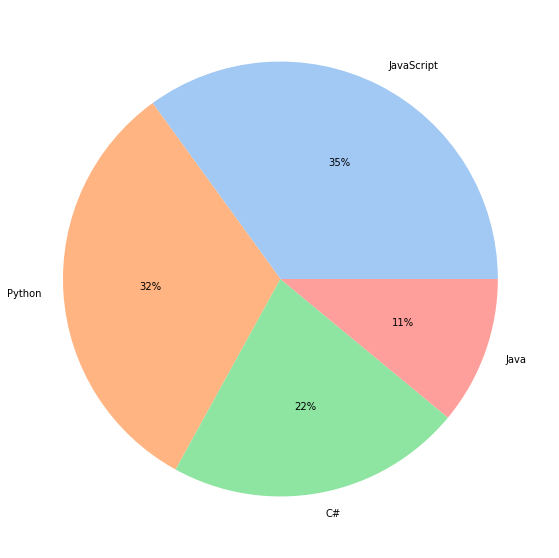

In [5]:
# visualization of target variable in data set 
e.pie(train)

<div class="alert alert-info">

### Takeaways: 

- Javascript makes up 35% of the sample 
- Python makes up 31% of sample 
- Based on sample we might infer that these are very popular languges among users of github 

<div class="alert alert-warning">

### Q2. Are there any specific words or word groups that can assist with identifying the Language JavaScript or Java over the other languages?

**A simple word count reveals that the word ```x``` is more prevalent in JavaScript than any other language.**

In [6]:
# display the word count for the "word" "x"
e.qmcbt_viz_01()

,JavaScript,C#,Java,Python,All
x,50,3,0,4,57


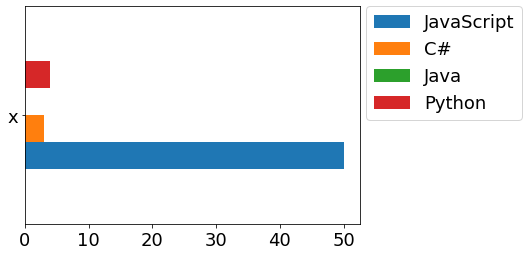

In [7]:
# display the appearance of the word "x" among repositories with different progr. languages
e.qmcbt_viz_02()

**A simple word count reveals that the word ```planet``` is more prevalent in Java than any other language.**

In [8]:
# display the word count for the word 'planet'
e.qmcbt_viz_03()

,JavaScript,C#,Java,Python,All
planet,4,5,19,3,31


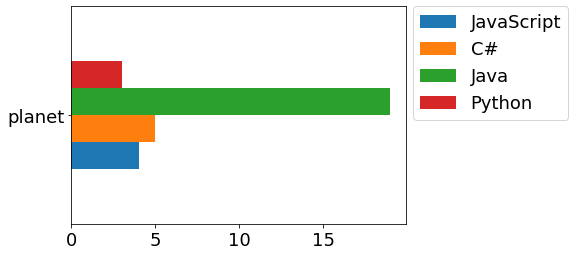

In [9]:
# show word 'planet' presence in programming languages
e.qmcbt_viz_04()

**Using an Bi-Gram function reveals that the word pair ```bug, fixed``` has the highest occurance in the Readme files for JavaScript, this Bi-Gram does not appear in the top 20 of any other languages.**

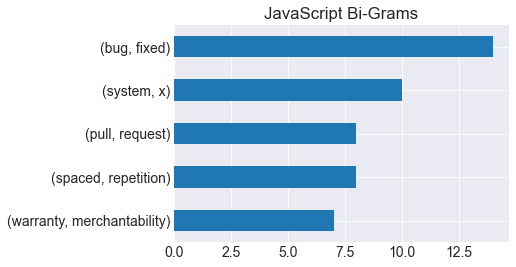

In [18]:
# show viz of of Javascript lemmatized text bigrams
e.qmcbt_viz_05()

<div class="alert alert-info">
    
### Takeaways:
### **YES** there are specific words and word groups that can assist with identifying the Language JavaScript or Java over the other languages.
* JavaScript
    * Single Word: ```'x'```
    * Bi-Gram: ```'bug, fixed'```
    * Tri-Gram: **NONE**

    
* Java
    * Single Word: ```'planet'```
    * Bi-Gram: **NONE**
    * Tri-Gram: **NONE**
    
### **The specific words and word-groups shown above appear to be good candidates for prediction of our target program language.** 
    * NOTE: There were no Bi-Gram or Tri-Gram groupings for Java that were used significantly more than all of the other languages.

<div class="alert alert-warning">

### Q3.What are the top words used in cleaned C#?

In [11]:
# top 10 words for c_sharp 
e.sort_by_language('c_sharp',e.cs_freq_clean,e.js_freq_clean, e.jv_freq_clean, e.py_freq_clean,e.all_freq_clean)

,c_sharp,javascript,java,python,all
&#9;,528,7,0,56,591
v,81,33,2,1,117
fix,78,1,0,2,81
fixed,72,82,1,2,157
parts,71,3,0,1,75
drag,50,1,0,0,51
ksp,48,0,0,0,48
part,46,5,0,2,53
stiffening,44,0,0,0,44
features,44,8,7,17,76


<div class="alert alert-info">

### Takeaways: 
- ```&#9``` is most recognized "word" in readme files that are coded in ```c#```
- The words with the highest count in ```c#``` but lowest in all other languages are ```ksp``` and ```stiffening```
- These words should be considered for modeling

<div class="alert alert-warning">

### Q4. What are the most used words in cleaned python strings? 

In [12]:
# top 10 words for python
e.sort_by_language('python',e.cs_freq_clean,e.js_freq_clean, e.jv_freq_clean, e.py_freq_clean,e.all_freq_clean)

,c_sharp,javascript,java,python,all
python,0,1,1,84,86
&#9;,528,7,0,56,591
codeblock,0,0,0,51,51
subnet,0,0,0,45,45
image,0,3,0,45,48
install,8,17,1,43,69
project,22,20,10,41,93
data,10,9,9,40,68
code,24,21,7,35,87
using,16,18,1,31,66


<div class="alert alert-info">

### Takeaways: 
- Python used infrequently in other readme files 
- Codeblock and subnet not used by other languages 
- Most used word is python 

<div class="alert alert-warning">

### Q5. Is there an association between coding language and the lemmatized mean of string lengths across languages?

### Hypothesis: 

* $H_o$: There is not a significant difference in the mean lemmatized string length of the languages.<br>
* $H_a$: There is a significant difference in the mean lemmatized string length of the languages .<br>

**Confidence interval**

For our tests we set the confidence interval 95%. Of one the results of the statistical tests is `p-value`. If p-value is going to be lower than 5% (`pvalue < 0.05`) we reject our null hypothesis.

### Statistical Test Using Kruskal Wallis

We run the Kruskall Wallis test to compare means of lemmatized strings length.

In [13]:
# results of statistical test
e.kruskal_test(e.js_lem_length, e.jv_lem_length,e.cs_lem_length,e.py_lem_length)

KruskalResult(statistic=1.5563404327437544, pvalue=0.6693293380228167)

__*Result: Fail to reject the null hypothesis.*__

<div class="alert alert-info">

### Takeaways: 
- Statistical tests does not support significant difference in means of lemmatized string lengths

<div class="alert alert-warning">

### Q6. Is there a significant difference in Sentiment across all four languages? 

### Hypothesis

* $𝐻_0$: Sentiment **is NOT** ```significantly different``` across languages  
* $𝐻_𝑎$: Sentiment **is** ```significantly different``` across languages

#### Visualization

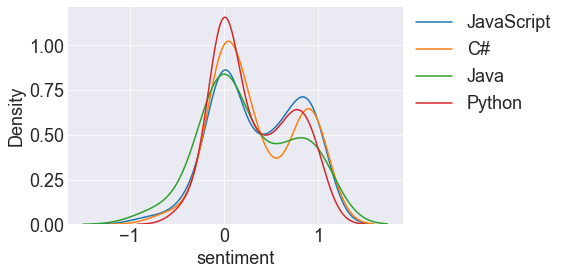

In [14]:
# show the sentiment distribution among programming languages
e.qmcbt_viz_06()

#### Statistical Test using ANOVA

We run ANOVA statistical test to compare means of independent samples.

In [15]:
# run Anova stat test
e.qmcbt_stat_01()

f_val: 0.4013359085711304
p_val: 0.7521678915596715
------------------------------
Fail to reject the null hypothesis


<div class="alert alert-info">

### Takeaways:    
    
### **NO** there is not a significant difference in Sentiment across all four languages.
    
### The Sentiment **is NOT** ```significantly different``` across the four program languages.
    
### **There is no evidence to support that the Sentiment of each program language Readme file is significantly different and will have an impact in determinng the program language.**  
    
* Based on this statistical finding we believe that Sentiment would not be an integral feature and should not be included in any machine learning efforts going forward.

<div class="alert alert-warning">

### Q7. How different are the bi-grams among four programming languages?

In the graphs below we show the most freqent occurance of bigrams in Javascript, Python, Java and C# repositories on GitHub.

In [19]:
from importlib import reload

In [27]:
reload(e)

<module 'explore_final' from '/Users/nadina/codeup-data-science/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project/explore_final.py'>

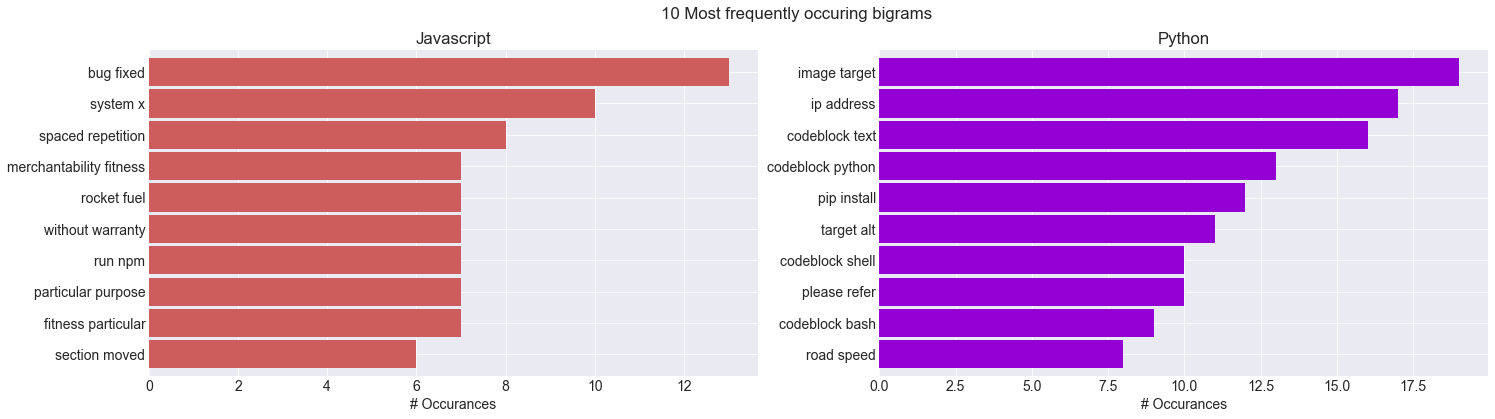

In [28]:
# display python vs JS bi-grams
e.python_js_bigrams(e.py_clean, e.js_clean)

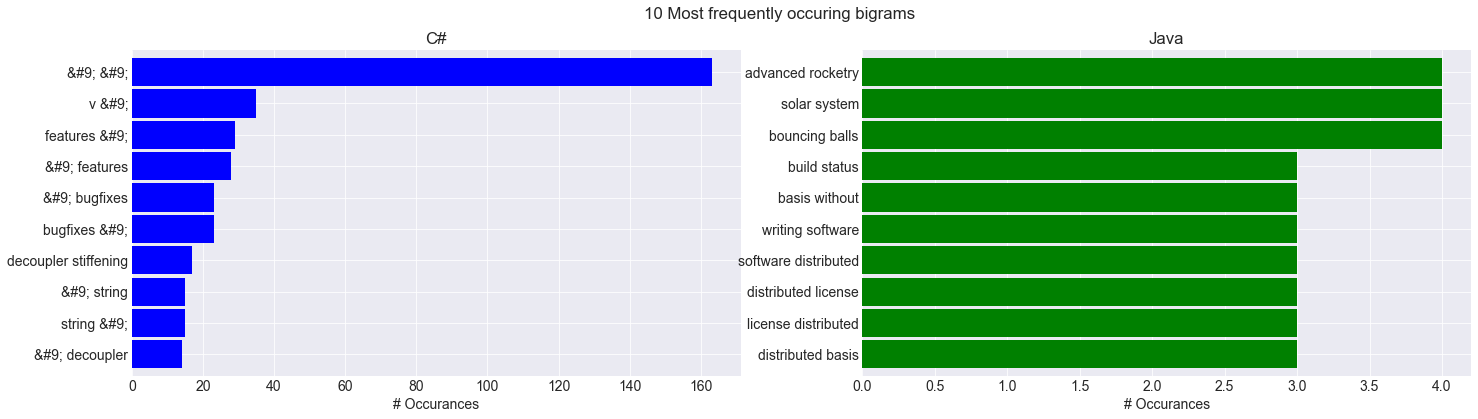

In [29]:
# display c# vs java bi-grams
e.csharp_java_bigrams(e.cs_clean, e.jv_clean)

<div class="alert alert-info">

### Takeaways: 
- Most of bi-grams differ in the GitHub repositories with separate languages. 
It can give the false hope that bi-grams can help to improve the model performance. Anyway, if we pay attenction to the x-axis, we can notice that the occurance of bigrams is very low. Only top bi-gram from C# occurs enough times to be used in the modeling part. But C# by itself already has the combination of symbols `&#9;` that occurs a lot in C# repositories.
- We are not going to use bi-grams for modeling.

<div class="alert alert-warning">

### Q4. Are there difference between the clean and lemmatized C# bi grams?

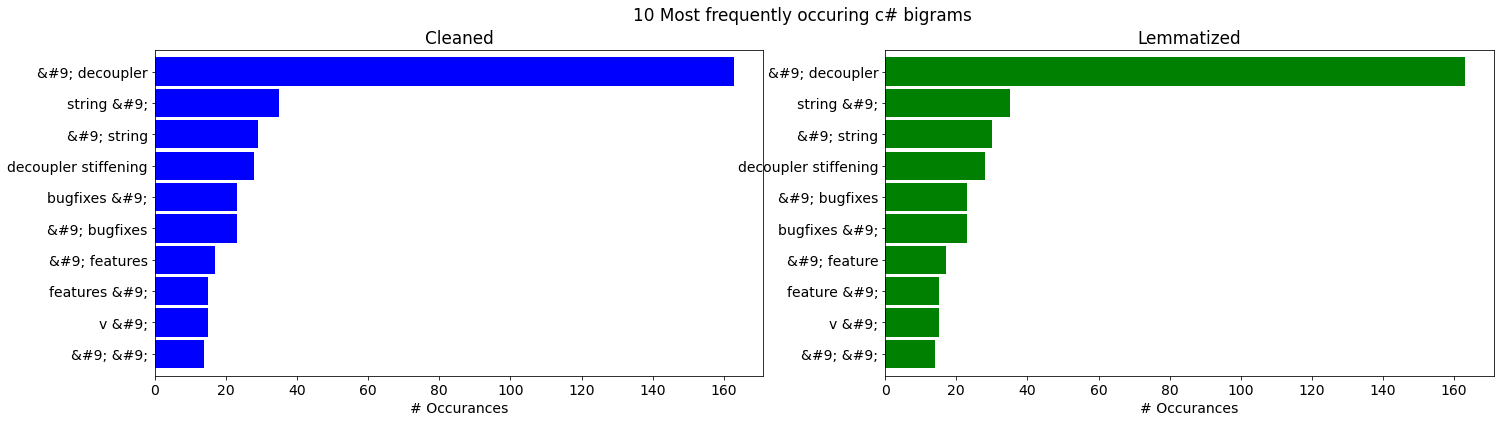

In [9]:
e.csharp_bigrams(e.cs_lem, e.cs_clean)

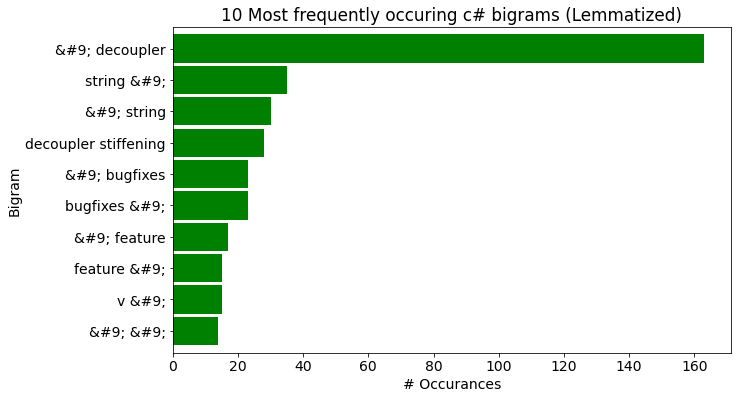

In [10]:
# 10 most commont bi grams for lemmatized c# strings
e.csharp_bigrams_lem(e.cs_lem)

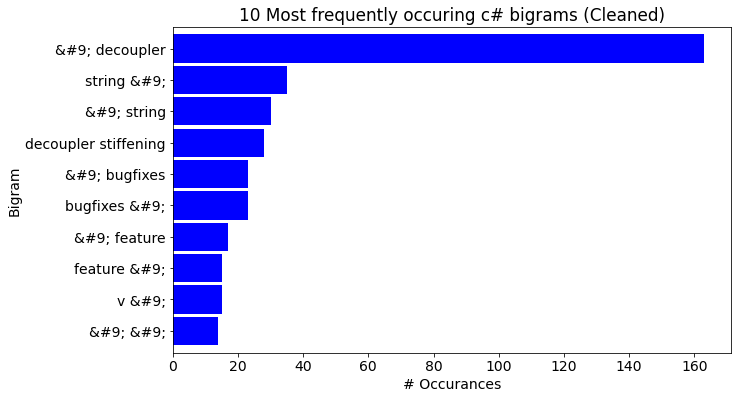

In [11]:
# 10 most commont bi grams for cleaned c# strings
e.csharp_bigrams_clean(e.cs_lem)

<div class="alert alert-info">

### Takeaways: 
- Minimal difference between cleaned c# strings and lemmatized strings 
- Same pairings but slightly different order 
- ```&#9;``` decoupler should be considered for modeling


<div class="alert alert-warning">

### Q5. Are there differences between the clean and lemmatized python bi grams?

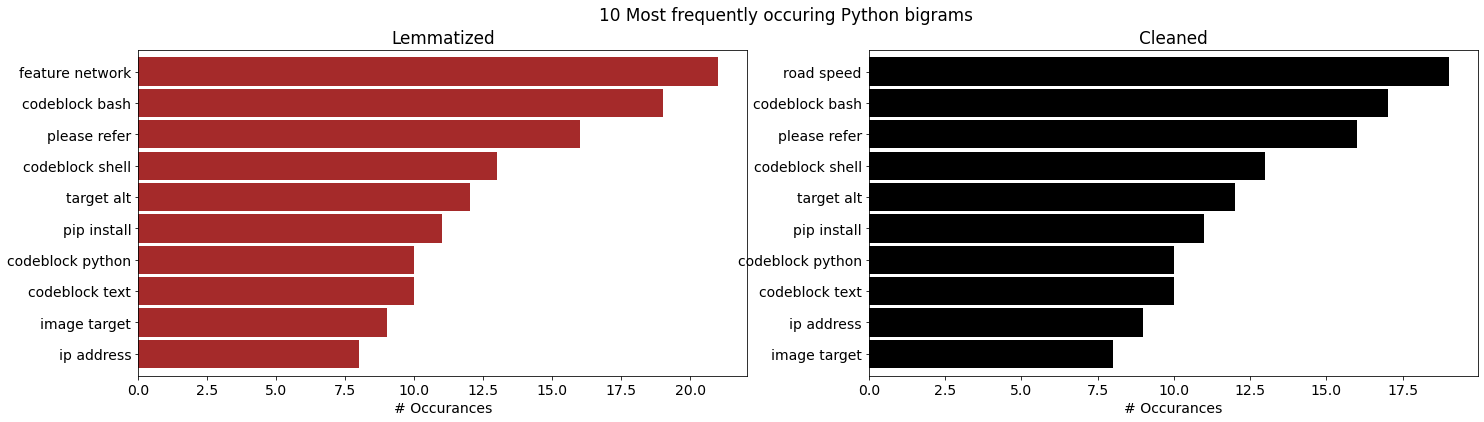

In [12]:
# show python bygrams in clean and lemmatized texts
e.python_bigrams(e.py_lem, e.py_clean)

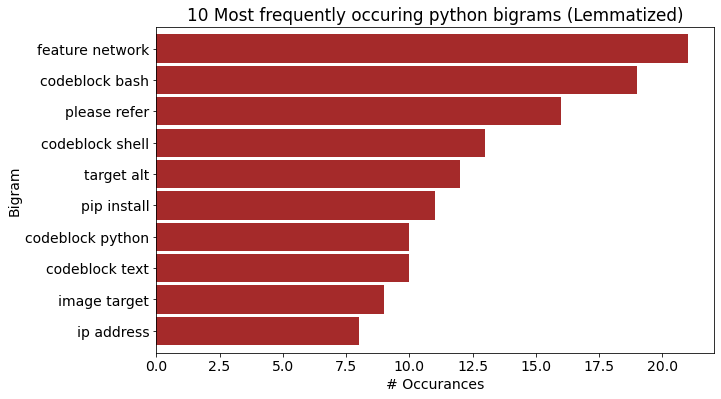

In [13]:
# 10 most commont bi grams for lemmatized python strings
e.python_bigram_lem(e.py_lem)

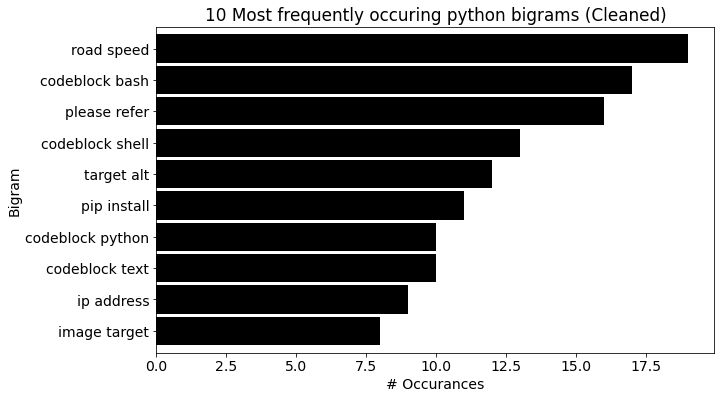

In [14]:
# top 10 most frequently occuring bi grams for cleaned python strings
e.python_bigrams_clean(e.py_clean)

<div class="alert alert-info">

### Takeaways: 
- Slight difference between words in clean vs lemmatized version
- Image target and IP address at the bottom of both lists 
- Feature network most frequent pair in lemmatized version
- Road speed most frequent pair in cleaned 
- feature network and road speed should be considered for modeling

### Exploration takeaways:
* In the space thematic Javascript is the most popular language. It makes up 35% of the data sample.
* Most popular "word" in **C#** is `&#9;`.
* The word `codeblock` appears only in **Python** repositories. 
* Most used in **Python** is `python`.
* The words that identifies **Java** most are `x` and `planet`.
* Most appearing bigram in **Javascript** is "bug fixed".
* Bi-grams different a lot among the programming languages `Readme` files, but the number of most occuring bi-grams is not big enough to use them in our modeling.
* There is *no significant difference* in the length of the lemmatized text among the languages.
* There is *no significant difference* in the compound sentiment score among the languages.

<div class="alert alert-success">


# Model:

To prepare the data set for modeling we:

- Lemmatized the cleaned text.
- Created the TFID vectorizer. 
- Using the vectorizer we created so called Bag of Words, that calculates how often the word appears in the text.
- Using the vectorizer we removed the words that appear in the text observations only once and this improved our models' performance.
- Separated the target variable from the train, validate and test data sets.

##### Feature engineering:
We have built additional features that we decided to keep for modeling. 

|Feature name|Description|
|:------|:-------|
|<img width=150/>|<img width=450/>|
|*sentiment*| calculates compound sentiment score|
|*lem_length*|the length of the lemmatized text|
|*original_length*| the length of the original text|
|*length_diff*| the difference in the length between orginal text and clean un-lemmatized text|

All engineered features are numerical and they were scaled prior to modeling.

After preparation the text, we jumped into modeling. Our goal was to create the model, that possibly could identify the programming language of the repository based on the text from `ReadMe` files. Our models can predict four programming languages: `JavaScript`, `C#`, `Java` and `Python`.

**The models we created**

We used following classifiers (classification algorithms): 
- Decision Tree, 
- Random Forest, 
- Logistic Regression,
- Gaussian NB,
- Multinational NB, 
- Gradient Boosting, and
- XGBoost. 

For most of our models we have used `GridSearchCV` algorithm that picked the best feature combinations for our training set. The parameters that we've used you can see below.

In [23]:
# run all models and print the parameters that the grid search considered the best ones for our training set.
md.run_all_classifiers()

Best parameters per algorithm:
----------------------------------------------------
Decision Tree Parameters:  {'max_depth': 6}
Random Forest Parameters:  {'max_depth': 5, 'min_samples_leaf': 2}
Logistic Regression: default paramters
Gaussian NB parameters: default paramters
Multinomial NB Parameters:  {'alpha': 0.2}
Gradient Boosting Parameters:  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 150}
XGBoost Parameters:  {'gamma': 0.2, 'max_depth': 4}



**Model evaluation**

To evaluate the models we used the accuracy score. The good outcome is the one where the `accuracy score` is higher than our `baseline` - the propotion of the most popular programming language in our train data set. It is `JavaScript` and `0.35`

In [24]:
# show the baseline
md.baseline

0.35

You can see below how our models performed on train and validate data sets.

In [25]:
# show the accuracy scores of the traing and validation sets
md.display_scores()

,model_name,train_score,validate_score,score_difference
1,Random Forest,0.634855,0.480769,0.154086
0,Decision Tree,0.622407,0.461538,0.160868
4,Multinomail Naive Bayes,0.892116,0.586538,0.305578
2,Logistic Regression,0.867220,0.548077,0.319143
3,Gaussian Naive Bayes,0.879668,0.509615,0.370053
5,Gradient Boosting,0.983402,0.548077,0.435326
6,XGBoost,0.979253,0.528846,0.450407


We can see that all models are not consistent. The accuracy scores drop signiffically from the train to validate set. We decided to use the Random Forest classifier for our test set. This classifier didn't get the highest accuracy score on the validation set, but showed the lowest difference in the scores.

Here are the results that we have got on the test set:

### Test:

In [26]:
# run the classifier on the test set
md.run_best_model()

,result
Model name,Random Forest
Train score,0.63
Validate score,0.48
Test score,0.59


Random Forest Classifier gets the 0.59% accuracy score which is 24% higher than the baseline score.

##### Modeling conclusions

While the accuracy score of our best model doesn't seem to be impressive, we are beating our baseline by 24%. On top of this we found that four most important features for the algorithms were `length_diff`, `lem_length`, `original_length` and `sentiment`. All those features we obtained through **_feature engineering_**.

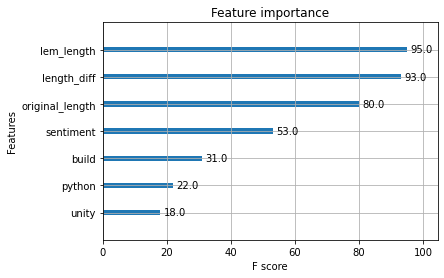

In [2]:
# display feature importance from xgboost classifier
md.display_feature_importance()

##### Modeling takeaways

- The best algorithm  is Random Forest Classifier with following parameters `{'max_depth': 5, 'min_samples_leaf': 3}`
- It predicts the programming language with 59% accuracy
- We did beat our baseline by 24%

<div class="alert alert-success">


# Conclusion:

<div class="alert alert-success">


# Reccomendations: